### 4.1. Equações do pêndulo simples, que definem o método de Euler convencional 
A Hamiltoniana adimensional do pêndulo simples é dada por:

$$
H(p, q) = \frac{p^2}{2} - \cos q
$$

O método de Euler convencional para sistemas Hamiltonianos é definido pelas equações:

$$
q^{(n+1)} = q^{(n)} + \Delta t \, \frac{\partial H}{\partial p}(q^{(n)}, p^{(n)})
$$

$$
p^{(n+1)} = p^{(n)} - \Delta t \, \frac{\partial H}{\partial q}(q^{(n)}, p^{(n)})
$$

Para o pêndulo simples, as derivadas da Hamiltoniana são:

- $\frac{\partial H}{\partial p} = p$
- $\frac{\partial H}{\partial q} = \sin q$

Substituindo estas derivadas nas equações do método de Euler, obtemos as expressões para
$q^{(n+1)}$ e $p^{(n+1)}$:

$$
q^{(n+1)} = q^{(n)} + \Delta t \cdot p^{(n)}
$$

$$
p^{(n+1)} = p^{(n)} - \Delta t \cdot \sin(q^{(n)})
$$

### 4.2. Implementação

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def integrate_pendulum(initial_state, dt, num_steps, method='euler'):
    q, p = initial_state
    
    q_list, p_list, E_list, t_list = [], [], [], []
    
    for n in range(num_steps):
        # Calcula a energia atual
        E = 0.5 * p**2 - np.cos(q)
        
        q_list.append(q)
        p_list.append(p)
        E_list.append(E)
        t_list.append(n * dt)
        
        if method == 'euler':
            # Método de Euler convencional
            q_new = q + dt * p
            p_new = p - dt * np.sin(q)
            q, p = q_new, p_new
        else: # Euler Simplético
            q_new = q + dt * p
            p_new = p - dt * np.sin(q_new)
            q, p = q_new, p_new
            
    return np.array(q_list), np.array(p_list), np.array(E_list), np.array(t_list)

### 4.3. Gráficos

Análise dos Resultados

O método de Euler convencional é um integrador de primeira ordem. Sua principal desvantagem
para sistemas Hamiltonianos é que ele não é simplético, ou seja, **não preserva a energia total
do sistema**. Os gráficos de $E(t)$ vs. $t$ deveriam ser uma linha reta horizontal, pois a energia é
uma constante de movimento. No entanto, você observará que a energia aumenta ou diminui com
o tempo. Esse desvio da conservação da energia é um erro numérico cumulativo.

- **Para a libração e rotação:**  
  As curvas de $q(t)$ e $p(t)$ parecerão corretas para passos de tempo muito pequenos.
  No entanto, para passos maiores (como $\Delta t = 10^{-1}$), a solução se tornará instável
  e divergirá rapidamente, exibindo um crescimento artificial da energia.

- **Impacto do $\Delta t$:**  
  O erro é inversamente proporcional ao tamanho do passo de tempo.
  Quanto menor o $\Delta t$, mais lentamente a energia total se desvia,
  e mais precisa é a solução. No entanto, a tendência de divergir permanece.

Analisando modo de Libração...
Analisando modo de Rotação...


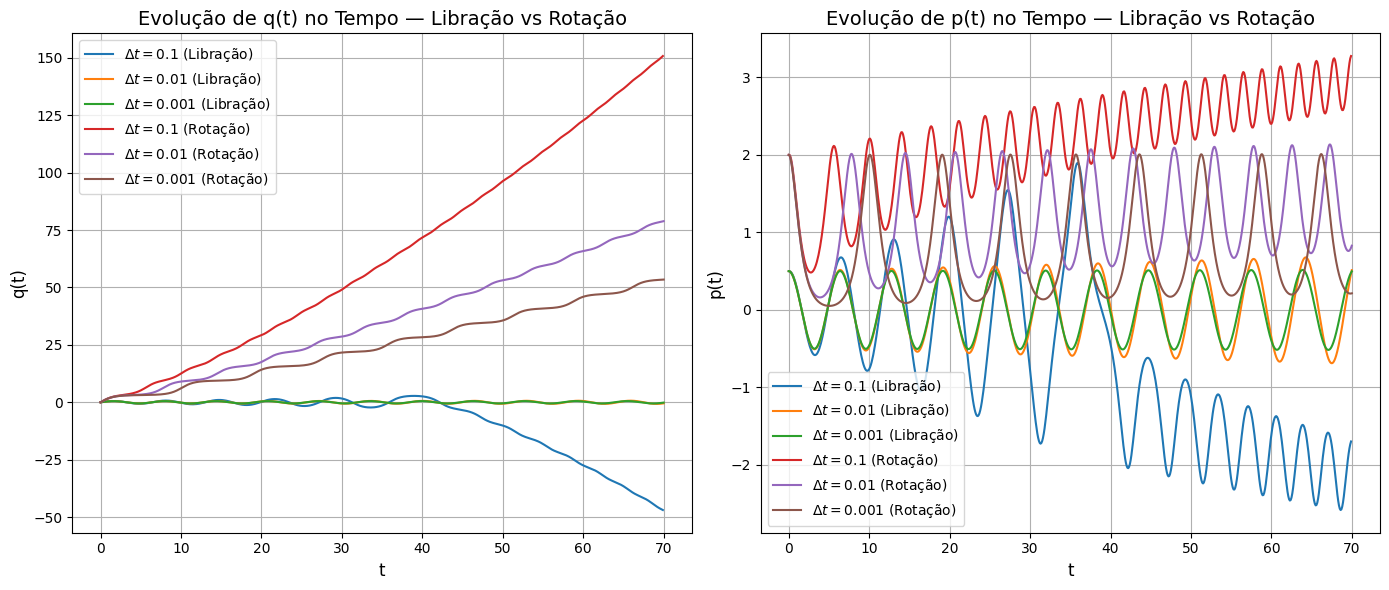

In [29]:
# ================================
# Função 1: q(t) e p(t) (Exercício 4.3)
# ================================
def plot_qp(integrate_pendulum, num_steps, time_steps, initial_states):
    fig_qp, axs_qp = plt.subplots(1, 2, figsize=(14, 6))

    for mode, initial_state in initial_states.items():
        print(f"Analisando modo de {mode}...")
        for dt in time_steps:
            num_steps = steps_for(dt)
            q, p, E, t = integrate_pendulum(initial_state, dt, num_steps)

            # Plotando q(t) e p(t)
            axs_qp[0].plot(t, q, label=f'$\\Delta t={dt}$ ({mode})')
            axs_qp[1].plot(t, p, label=f'$\\Delta t={dt}$ ({mode})')

    # Formatação
    axs_qp[0].set_xlabel('t', fontsize=12)
    axs_qp[0].set_ylabel('q(t)', fontsize=12)
    axs_qp[0].set_title('Evolução de q(t) no Tempo — Libração vs Rotação', fontsize=14)
    axs_qp[0].grid(True)
    axs_qp[0].legend()

    axs_qp[1].set_xlabel('t', fontsize=12)
    axs_qp[1].set_ylabel('p(t)', fontsize=12)
    axs_qp[1].set_title('Evolução de p(t) no Tempo — Libração vs Rotação', fontsize=14)
    axs_qp[1].grid(True)
    axs_qp[1].legend()

    plt.tight_layout()
    plt.show()



# ================================
# Execução das análises
# ================================
num_steps_base = 700          # o que você já usava
dt_base        = 0.1
T_target       = num_steps_base * dt_base 

def steps_for(dt, T=T_target):
    return int(round(T / dt))

time_steps = [0.1, 0.01, 0.001]
initial_states = {
    'Libração': (0.0, 0.5),
    'Rotação': (0.0, 2.0)
}

plot_qp(integrate_pendulum, num_steps, time_steps, initial_states)

### 4.4. Análise da curva da Energia

O gráfico de $E(t)$ em função do tempo para os dois modos (Libração e Rotação) mostra claramente a sensibilidade do sistema ao passo de integração $\Delta t$. Para $\Delta t = 0.1$, observa-se um crescimento artificial da energia ao longo do tempo, evidenciando um erro numérico acumulado do método de integração, tanto na libração quanto na rotação. Já para $\Delta t = 0.01$, o erro é significativamente menor e a energia permanece praticamente constante, condizente com a conservação esperada em sistemas hamiltonianos. Por fim, para $\Delta t = 0.001$, a energia se mantém estável ao longo de toda a simulação, reforçando a consistência numérica do método quando o passo de tempo é suficientemente pequeno.

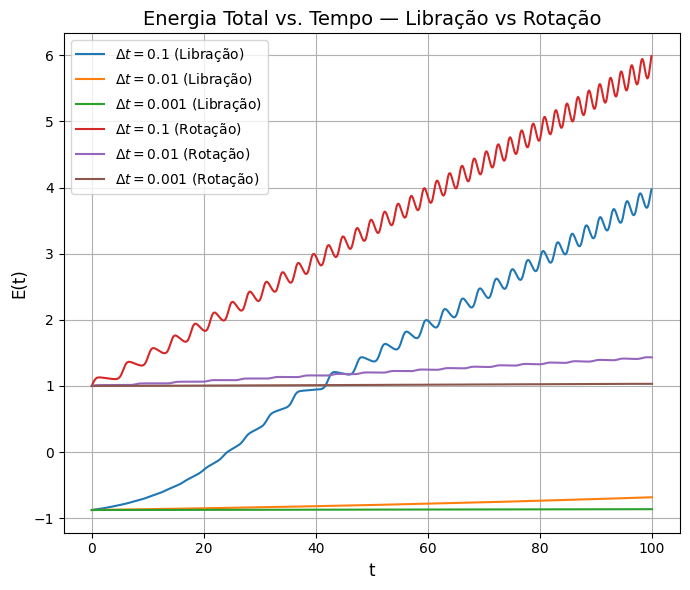

In [ ]:
# ================================
# Função 2: Energia (Exercício 4.4)
# ================================
def plot_energy(integrate_pendulum, num_steps, time_steps, initial_states):
    fig_E, axs_E = plt.subplots(1, 1, figsize=(7, 6))

    for mode, initial_state in initial_states.items():
        for dt in time_steps:
            num_steps = steps_for(dt)
            q, p, E, t = integrate_pendulum(initial_state, dt, num_steps)
            axs_E.plot(t, E, label=f'$\\Delta t={dt}$ ({mode})')

    # Formatação
    axs_E.set_xlabel('t', fontsize=12)
    axs_E.set_ylabel('E(t)', fontsize=12)
    axs_E.set_title('Energia Total vs. Tempo — Libração vs Rotação', fontsize=14)
    axs_E.grid(True)
    axs_E.legend()

    plt.tight_layout()
    plt.show()


# ================================
# Execução das análises
# ================================
num_steps_base = 1000       
dt_base        = 0.1
T_target       = num_steps_base * dt_base 

def steps_for(dt, T=T_target):
    return int(round(T / dt))

time_steps = [0.1, 0.01, 0.001]
initial_states = {
    'Libração': (0.0, 0.5),
    'Rotação': (0.0, 2.0)
}


plot_energy(integrate_pendulum, num_steps, time_steps, initial_states)

### 4.5 Trajetória no Espaço de Fase

### Libração
- **Comportamento esperado:** órbitas quase elípticas fechadas (energia aproximadamente constante).
- **Observado:** para **Δt = 0.1** a trajetória espirala para fora, indicando ** ganho artificial de energia** típico do Euler convencional.  
- Para **Δt = 0.01** e **Δt = 0.001**, as curvas ficam muito mais próximas de um arco elíptico estável, com **drift bem menor** — coerente com melhor conservação de energia quando o passo diminui.
- **Conclusão (libração):** o erro numérico cresce rapidamente para Δt grande; passos menores aproximam o comportamento físico esperado (órbita “quase-fechada”).

### Rotação
- **Comportamento esperado:** rotação com “oscilações” suaves de \(p(t)\) ao cruzar diferentes \(q(t)\), mantendo energia quase constante.
- **Evidência de erro:** a marcação dos **mínimos de \(p(t)\)** mostra um **drift vertical** acumulado. Para **Δt = 0.1**, a medida anotada no gráfico indica **Δp ≈ 0.338** entre o primeiro e o último mínimo, evidenciando **não conservação** de energia.
- Para **Δt = 0.01** e **Δt = 0.001** esse deslocamento é muito menor (mínimos praticamente coincidentes), indicando **erro bem reduzido**.
- **Conclusão (rotação):** o Euler convencional com Δt grande introduz drift sistemático (crescimento de energia); diminuir Δt melhora substancialmente a fidelidade numérica.

**Síntese geral:** Em ambos os regimes, o Euler convencional **não conserva energia** e o erro **aumenta** com Δt. Para análises de longo tempo (especialmente rotação), é essencial **usar Δt pequeno** ou **adotar um integrador simplético** para preservar a estrutura Hamiltoniana.

Plotando espaço de fase para Libração...


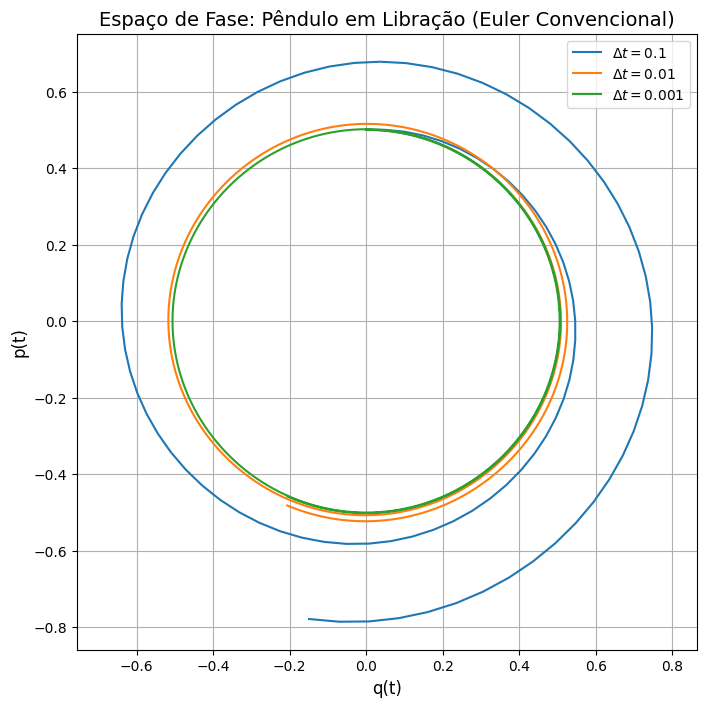

In [ ]:
# ================================
# Execução das análises
# ================================

num_steps_base = 100        
dt_base        = 0.1
T_target       = num_steps_base * dt_base 

def steps_for(dt, T=T_target):
    return int(round(T / dt))

time_steps = [0.1, 0.01, 0.001]
initial_states = {
    'Libração': (0.0, 0.5),
    'Rotação': (0.0, 2.0)
}

# Gráfico de espaço de fase para a Libração
plt.figure(figsize=(8, 8))

mode = 'Libração'
initial_state = initial_states[mode]

print(f"Plotando espaço de fase para {mode}...")
for dt in time_steps:
    num_steps = steps_for(dt)
    q, p, E, t = integrate_pendulum(initial_state, dt, num_steps)
    plt.plot(q, p, label=f'$\\Delta t={dt}$')

# Formatação do gráfico de libração
plt.xlabel('q(t)', fontsize=12)
plt.ylabel('p(t)', fontsize=12)
plt.title(f'Espaço de Fase: Pêndulo em Libração (Euler Convencional)', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

Plotando espaço de fase para Rotação...


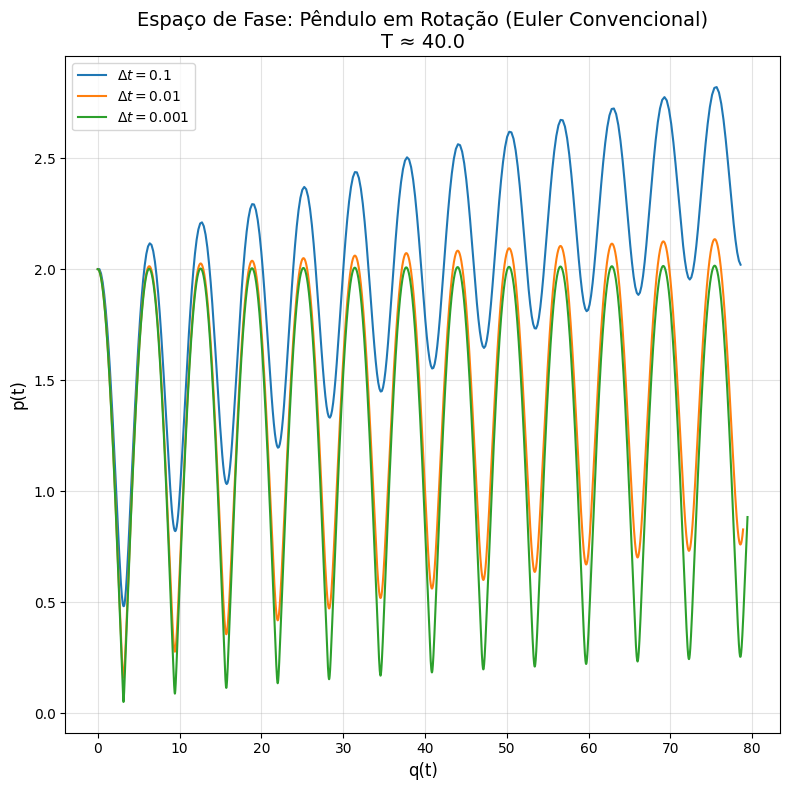

In [57]:
# Tempo total alvo (igual para todas simulações)
T_target = 40.0                 

steps_per_dt = {
    0.1:   430,   # ajuste à mão
    0.01:  7000,   # ajuste à mão
    0.001: 100000,  # ajuste à mão
}

# helper: quantos passos para um dado dt?
def steps_for(dt, T=T_target):
    return int(round(T / dt))

import matplotlib.pyplot as plt

time_steps = [0.1, 0.01, 0.001]
initial_states = {
    'Libração': (0.0, 0.5),
    'Rotação' : (0.0, 2.0),
}

mode = 'Rotação'   # ou 'Libração'
initial_state = initial_states[mode]

plt.figure(figsize=(8, 8))
print(f"Plotando espaço de fase para {mode}...")

for dt in time_steps:
    num_steps = steps_per_dt[dt]              # << chave: mesmo T para todos os dt
    q, p, E, t = integrate_pendulum(initial_state, dt, num_steps)
    plt.plot(q, p, label=f'$\\Delta t={dt}$')

plt.xlabel('q(t)', fontsize=12)
plt.ylabel('p(t)', fontsize=12)
plt.title(f'Espaço de Fase: Pêndulo em {mode} (Euler Convencional)\nT ≈ {T_target}', fontsize=14)
plt.grid(True, which='both', alpha=0.35)
# evite axis('equal') aqui porque na rotação q cresce e pode “achatar” o gráfico
plt.legend()
plt.tight_layout()
plt.show()


### 4.6. Expressões do Euler Simplético

Para o pêndulo simples, cuja Hamiltoniana é

$$
H(p, q) = \frac{p^2}{2} - \cos q ,
$$

as derivadas são:

- $\dfrac{\partial H}{\partial p} = p$
- $\dfrac{\partial H}{\partial q} = \sin q$

Substituindo nas equações do método de Euler Simplético, obtemos:

$$
q^{(n+1)} = q^{(n)} + \Delta t \cdot p^{(n)}
$$

$$
p^{(n+1)} = p^{(n)} - \Delta t \cdot \sin(q^{(n+1)})
$$

Para o pêndulo simples adimensional com $H(q,p)=\tfrac{p^2}{2}-\cos q$ e $H=K(p)+U(q)$ separável:

$$
\frac{\partial H}{\partial p}=p,\qquad \frac{\partial H}{\partial q}=\sin q.
$$

O **método de Euler simplético** (Euler–Cromer), conforme as Equações (9) do texto, fica:

$$
\boxed{
\begin{aligned}
q^{(n+1)} &= q^{(n)} + \Delta t\,\frac{\partial H}{\partial p}\Big|_{p^{(n)}} 
          = q^{(n)} + \Delta t\,p^{(n)}, \\[4pt]
p^{(n+1)} &= p^{(n)} - \Delta t\,\frac{\partial H}{\partial q}\Big|_{q^{(n+1)}} 
          = p^{(n)} - \Delta t\,\sin\!\big(q^{(n+1)}\big).
\end{aligned}}
$$

> Observação: a ordem é crucial para o caráter simplético: primeiro atualizamos $q$ com $p^{(n)}$,
> depois atualizamos $p$ usando $q^{(n+1)}$.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def integrate_pendulum(initial_state, dt, num_steps, method='euler'):
    q, p = initial_state
    
    q_list, p_list, E_list, t_list = [], [], [], []
    
    for n in range(num_steps):
        # Calcula a energia atual
        E = 0.5 * p**2 - np.cos(q)
        
        q_list.append(q)
        p_list.append(p)
        E_list.append(E)
        t_list.append(n * dt)
        
        if method == 'euler':
            # Método de Euler convencional
            q_new = q + dt * p
            p_new = p - dt * np.sin(q)
            q, p = q_new, p_new
        elif method == 'euler_symplectic':
            # Método de Euler Simplético (a ordem importa!)
            q_new = q + dt * p
            p_new = p - dt * np.sin(q_new) # Usa a nova posição para calcular o novo momento
            q, p = q_new, p_new
            
    return np.array(q_list), np.array(p_list), np.array(E_list), np.array(t_list)

### 4.8 Análise da trajetória da energia

Ao contrário do método de Euler convencional, as curvas de energia total ($E$ vs. $t$) 
para o método simplético são muito próximas de retas horizontais, o que evidencia melhor a propriedade de 
conservação de energia. Além disso, as curvas de $q(t)$ e $p(t)$ não irão divergir ou se tornar instáveis, 
mesmo para passos de tempo grandes, como no caso do método convencional.

Analisando modo de Libração com Euler Simplético...
Analisando modo de Rotação com Euler Simplético...


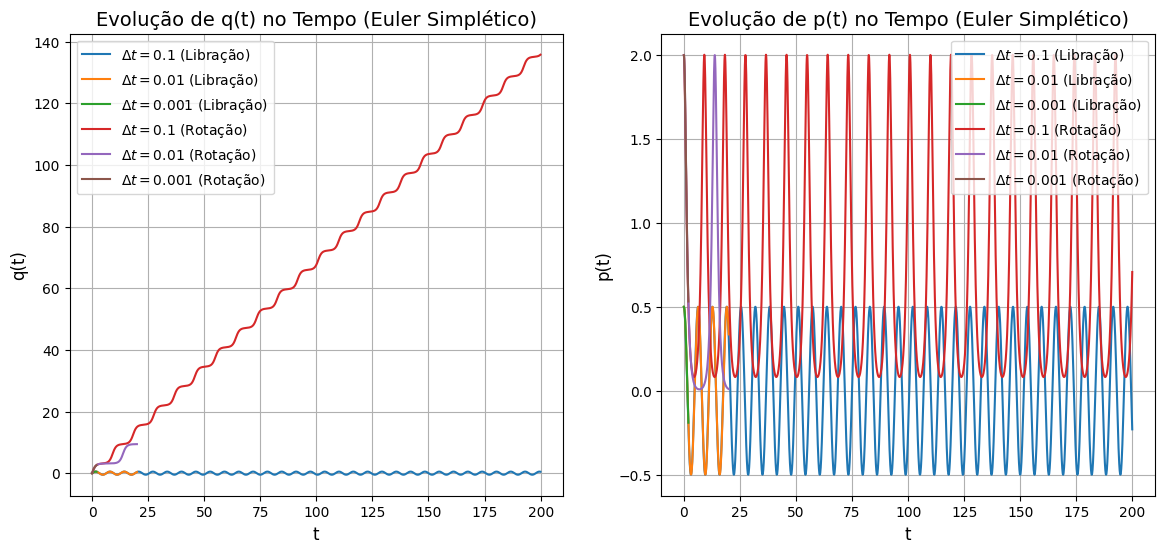

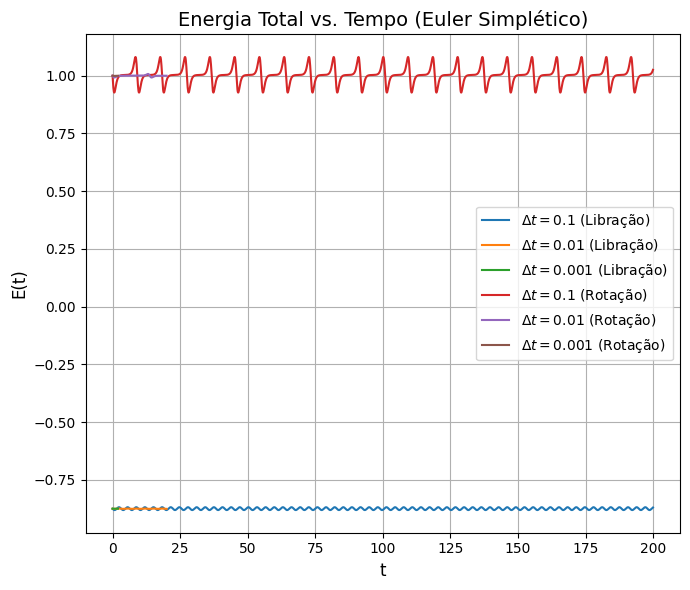

In [35]:
# Parâmetros de simulação
num_steps_longo = 2000 # Use um número grande de passos para ver a conservação da energia
time_steps = [0.1, 0.01, 0.001]
initial_states = {
    'Libração': (0.0, 0.5),
    'Rotação': (0.0, 2.0)
}

# Gráfico para q(t) vs t e p(t) vs t (Exercício 4.8)
fig_qp, axs_qp = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico para E(t) vs t (Exercício 4.9)
fig_E, axs_E = plt.subplots(1, 1, figsize=(7, 6))

for mode, initial_state in initial_states.items():
    print(f"Analisando modo de {mode} com Euler Simplético...")
    for dt in time_steps:
        q, p, E, t = integrate_pendulum(initial_state, dt, num_steps_longo, method='euler_symplectic')
        
        axs_qp[0].plot(t, q, label=f'$\\Delta t={dt}$ ({mode})')
        axs_qp[1].plot(t, p, label=f'$\\Delta t={dt}$ ({mode})')

        axs_E.plot(t, E, label=f'$\\Delta t={dt}$ ({mode})')

# Formatação dos gráficos
axs_qp[0].set_xlabel('t', fontsize=12)
axs_qp[0].set_ylabel('q(t)', fontsize=12)
axs_qp[0].set_title('Evolução de q(t) no Tempo (Euler Simplético)', fontsize=14)
axs_qp[0].grid(True)
axs_qp[0].legend()

axs_qp[1].set_xlabel('t', fontsize=12)
axs_qp[1].set_ylabel('p(t)', fontsize=12)
axs_qp[1].set_title('Evolução de p(t) no Tempo (Euler Simplético)', fontsize=14)
axs_qp[1].grid(True)
axs_qp[1].legend()

axs_E.set_xlabel('t', fontsize=12)
axs_E.set_ylabel('E(t)', fontsize=12)
axs_E.set_title('Energia Total vs. Tempo (Euler Simplético)', fontsize=14)
axs_E.grid(True)
axs_E.legend()

plt.tight_layout()
plt.show()

### 4.10 Análise do Espaço de Fase

Ao contrário do método de Euler convencional, as órbitas de libração serão elipses fechadas e as de rotação serão ondas abertas, mas sem o espiralamento para fora. Isso ocorre porque o método simplético preserva a área do espaço de fase (teorema de Liouville) e, portanto, mantém a estrutura do sistema dinâmico. Essa é a principal vantagem dos integradores simpléticos para a simulação de longo prazo de sistemas Hamiltonianos. 

Plotando espaço de fase para Libração com Euler Simplético...


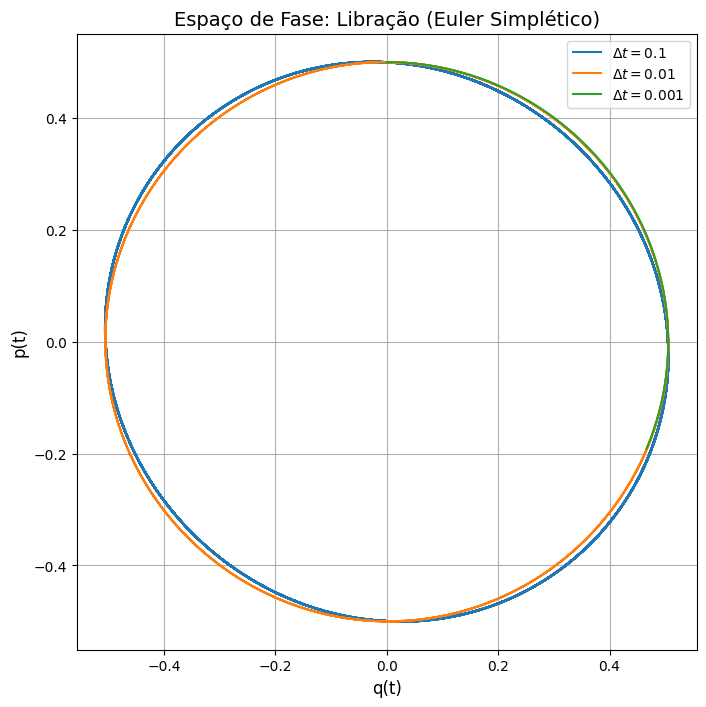

Plotando espaço de fase para Rotação com Euler Simplético...


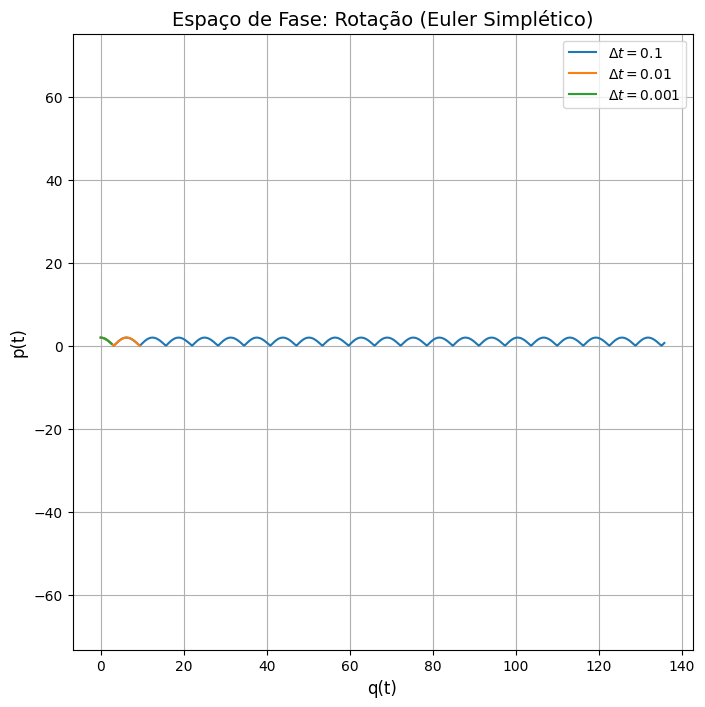

In [36]:
# Gráfico para p(t) vs q(t) (Exercício 4.10)
# Seus gráficos devem ser separados para Libração e Rotação

# 1. Gráfico de Libração
plt.figure(figsize=(8, 8))

mode = 'Libração'
initial_state = initial_states[mode]

print(f"Plotando espaço de fase para {mode} com Euler Simplético...")
for dt in time_steps:
    q, p, E, t = integrate_pendulum(initial_state, dt, num_steps_longo, method='euler_symplectic')
    plt.plot(q, p, label=f'$\\Delta t={dt}$')

plt.xlabel('q(t)', fontsize=12)
plt.ylabel('p(t)', fontsize=12)
plt.title(f'Espaço de Fase: Libração (Euler Simplético)', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

# 2. Gráfico de Rotação
plt.figure(figsize=(8, 8))

mode = 'Rotação'
initial_state = initial_states[mode]

print(f"Plotando espaço de fase para {mode} com Euler Simplético...")
for dt in time_steps:
    q, p, E, t = integrate_pendulum(initial_state, dt, num_steps_longo, method='euler_symplectic')
    plt.plot(q, p, label=f'$\\Delta t={dt}$')

plt.xlabel('q(t)', fontsize=12)
plt.ylabel('p(t)', fontsize=12)
plt.title(f'Espaço de Fase: Rotação (Euler Simplético)', fontsize=14)
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

### 4.11. Jacobiano dos mapas do método de Euler Convencional e Simplético

#### Mapa (4) — Método de Euler Explícito

$$
\begin{cases}
q_{n+1} = q_n + \Delta t \, \dfrac{\partial H}{\partial p}(q_n, p_n) \\[6pt]
p_{n+1} = p_n - \Delta t \, \dfrac{\partial H}{\partial q}(q_n, p_n)
\end{cases}
$$

Jacobiano:

$$
J^{(4)} = 
\begin{bmatrix}
\dfrac{\partial q_{n+1}}{\partial q_n} & \dfrac{\partial q_{n+1}}{\partial p_n} \\[6pt]
\dfrac{\partial p_{n+1}}{\partial q_n} & \dfrac{\partial p_{n+1}}{\partial p_n}
\end{bmatrix}
$$

Determinante:

$$
\det(J^{(4)}) = 1 + \Delta t^2 \, 
\dfrac{\partial^2 H}{\partial q^2}(q_n,p_n)\;
\dfrac{\partial^2 H}{\partial p^2}(q_n,p_n)
$$

---

#### Mapa (9) — Euler Simples (Variante Implícita)

$$
\begin{cases}
q_{n+1} = q_n + \Delta t \, \dfrac{\partial H}{\partial p}(q_n, p_{n+1}) \\[6pt]
p_{n+1} = p_n - \Delta t \, \dfrac{\partial H}{\partial q}(q_n, p_{n+1})
\end{cases}
$$

Jacobiano:

$$
J^{(9)} = 
\begin{bmatrix}
\dfrac{\partial q_{n+1}}{\partial q_n} & \dfrac{\partial q_{n+1}}{\partial p_n} \\[6pt]
\dfrac{\partial p_{n+1}}{\partial q_n} & \dfrac{\partial p_{n+1}}{\partial p_n}
\end{bmatrix}
$$

Determinante:

$$
\det(J^{(9)}) = 1
$$

---

### Conclusão

- Para o **mapa (4)** o determinante não é, em geral, igual a 1. Logo, **não é simplético**.  
- Para o **mapa (9)** o determinante é exatamente 1, o que evidencia o fato de que o método **é simplético**.